<h1><p style="text-align: center;">Приоритизация гипотез и анализ результатов А/В-теста для интернет-магазина</p></h1>
<h2>Содержание<span class="tocSkip"></span></h2>
<div class="toc"><ol class="toc-item">
    <li> Приоритизация гипотез
        <ul class="toc-item">
            <li> Изучение общей информации из файла и подготовка данных </li>
            <li> Приоритизация гипотез с помощью ICE и RICE </li>
            <li> Выводы </li>
        </ul> 
    </li>
    <li> Анализ A/B-теста
        <ul class="toc-item">
            <li> Изучение общей информации из файлов и подготовка данных </li>
            <li> Кумулятивные метрики </li>
            <li> Определение аномальных пользователей </li>
            <li> Анализ выбросов и всплесков </li>
            <li> Выводы и принятие решения </li>
        </ul>
    </li>
    <li> Общий вывод</li>
</ol></div>

In [1]:
import pandas as pd
import datetime as dt
from scipy import stats as st
import matplotlib.pyplot as plt
import math as mth
import numpy as np
import warnings

# Часть 1. Приоритизация гипотез
## Изучение общей информации из файла и подготовка данных

Откроем файл с данными и изучим общую информацию

In [2]:
hypothesis = pd.read_csv('') # в '' пишем наименование csv-файла с данными
warnings.filterwarnings("ignore")

hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Видим, что в данных нет пропусков, типы данных заданы корректно, поэтому обрабатывать в этом датафрейме особенно нечего.
Можем привести наименования столбцов к нижнему регистру в целях стандартизации.

In [3]:
hypothesis.columns = hypothesis.columns.str.lower()
hypothesis.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

## Приоритизация гипотез с помощью ICE и RICE


Применим фреймворк ICE для приоритизации гипотез. Отсортируем  их по убыванию приоритета.

In [4]:
hypothesis['ICE'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
pd.options.display.max_colwidth = 400
hypothesis[['hypothesis', 'ICE']].sort_values(by = 'ICE', ascending = False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


Видим, что наиболее перспективными гипотезами являются гипотезы с порядковыми номерами (в порядке убывания приоритетности): 9, 1, 8, 7, 3. Наименее перспективные гипотезы, соответственно - 5-я, 4-я, 6-я, 2-я.

Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [5]:
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
pd.options.display.max_colwidth = 400
hypothesis.sort_values(by = 'RICE', ascending = False)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


Видим, что что среди наиболее перспективных гипотез снова гипотезы с порядковыми номерами: 9, 1, 8, 7, 3. Однако порядок приоритетности изменился, теперь на первом месте гипотеза под номером 8, а на втором - под номером 3.

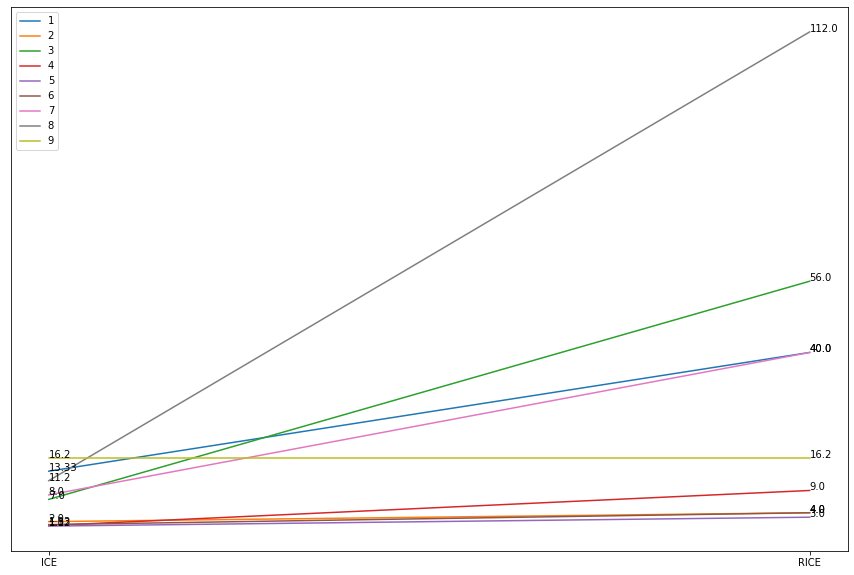

In [6]:
myplot = hypothesis[['ICE', 'RICE']].T.plot(figsize=(15,10), xticks=[0, 1], yticks=[])
df = pd.DataFrame({'ICE': [0], 'RICE': [1]})
for i in hypothesis['ICE']:
    myplot.text(0,i,round(i,2))
for i in hypothesis['RICE']:    
    myplot.text(1,i,i)
myplot.legend([1,2,3,4,5,6,7,8,9])

## Выводы

Таким образом, очевидно, что приоритизация гипотез при применении RICE вместо ICE несколько изменилась, так произошло из-за параметра Reach, который показывает, скольких пользователей затронет изменение, которое мы хотим внести. У гипотез с номерами 8 и 3 он равен, соответственно 10 и 8 баллам, в то время, как у других гипотез этот показатель набрал сильно меньше баллов.
Поскольку при выборе гипотез в качестве наиболее приоритетных и перспективных необходимо, в том числе, учитывать охват пользователей, которых она затронет, лучше руководствоваться приоритизацией с помощью RICE.

# Часть 2. Анализ A/B-теста
## Изучение общей информации из файлов и подготовка данных

Откроем файлы с данными и изучим общую информацию

In [7]:
orders = pd.read_csv('') # в '' пишем наименование csv-файла с данными
visitors = pd.read_csv('') # в '' пишем наименование csv-файла с данными

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


В данном датафрейме нет пропусков, можно привести данные в столбце date к формату дата-время для удобства дальнейших расчётов.
Также можем привести наименования столбцов transactionId и visitorId к стандартному формату для удобства читаемости.

In [8]:
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')
orders = orders.rename(columns={'transactionId':'transaction_id', 'visitorId': 'visitor_id'})

In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


С датафреймом orders больше ничего делать не будем, взглянем на датафрейм visitors.

In [10]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


В этом датафрейме также нет пропусков, но мы можем привести данные в столбце date также к формату датавремя для удобства дальнейших расчётов.

In [11]:
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Теперь проверим корректность разбиения посетителей на группы, возможно, есть посетители, попавшие в обе группы. 

In [12]:
#сначала формируем срез уникальных пользователей в нашем датафрейме по группам
unique_visitors = orders.groupby('visitor_id')['group'].nunique()
#далее объединяем датафрейм orders с получившимся срезом уникальных пользователей по группам
orders = orders.merge(unique_visitors, on = 'visitor_id').rename(columns = {'group_x':'group', 'group_y': 'repeated_visitors'})
orders.head(10)

,transaction_id,visitor_id,date,revenue,group,repeated_visitors
0,3667963787,3312258926,2019-08-15,1650,B,1
1,2804400009,3642806036,2019-08-15,730,B,1
2,2961555356,4069496402,2019-08-15,400,A,2
3,1473132782,4069496402,2019-08-12,640,B,2
4,3797467345,1196621759,2019-08-15,9759,B,1
5,2282983706,2322279887,2019-08-15,2308,B,1
6,182168103,935554773,2019-08-15,2210,B,1
7,398296753,2900797465,2019-08-15,1860,B,1
8,2626614568,78758296,2019-08-15,1044,A,1
9,1576988021,295230930,2019-08-15,13710,A,1


In [13]:
overlap = len(orders.query('repeated_visitors == 2'))/len(orders)
display(f'Пересечение групп составляет: {overlap:.2%}')
orders['repeated_visitors'].unique()

'Пересечение групп составляет: 15.12%'

array([1, 2])

В столбце repeated_visitors у нас фигурируют значения 1 и 2, 1 - означает, что данный посетитель попал только в одну из групп, 2 - посетитель попал в обе группы, поскольку пересечение групп сильно влияет на результаты теста, если процент достаточно большой (в нашем случае, довольно ощутимый - чуть больше 15%), то мы попробуем удалить таких посетителей из нашего датафрейма.

In [14]:
orders = orders.query('repeated_visitors == 1').drop('repeated_visitors', 1)
orders.head(10)

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
4,3797467345,1196621759,2019-08-15,9759,B
5,2282983706,2322279887,2019-08-15,2308,B
6,182168103,935554773,2019-08-15,2210,B
7,398296753,2900797465,2019-08-15,1860,B
8,2626614568,78758296,2019-08-15,1044,A
9,1576988021,295230930,2019-08-15,13710,A
10,1506739906,1882260405,2019-08-15,1855,B
11,3649131742,879864040,2019-08-15,4008,A


Данные обработаны, теперь можем начать анализ А/В-теста.

## Кумулятивные метрики

Для начала построим график кумулятивной выручки по группам.

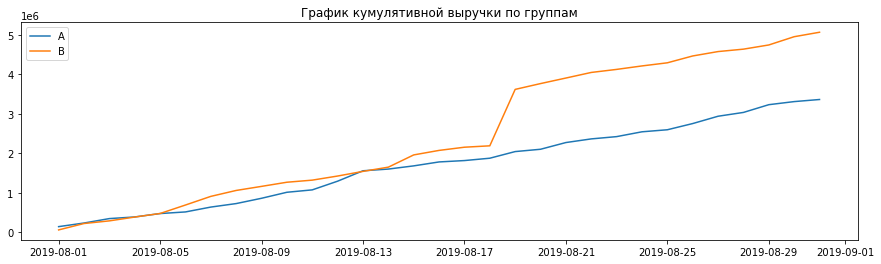

In [15]:
#создадим датафрейм dates_groups с уникальными парами значений 'date' и 'group' из таблицы orders, 
#избавимся от дубликатов методом drop_duplicates()
dates_groups = orders[['date', 'group']].drop_duplicates()

#объявим переменную orders_aggregated, содержащую: дату, группу A/B-теста, число уникальных транзакций 
#в группе теста по указанную дату включительно, число уникальных посетителей, совершивших хотя бы 
#одну транзакцию в группе теста по указанную дату включительно, суммарную выручку транзакций в группе теста по 
#указанную дату включительно, отсортируем получившийся датафрейм по столбцам 'date', 'group'
orders_aggregated = (
    dates_groups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
    .agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1)
    .sort_values(by=['date','group'])
)
    
#объявим переменную visitors_aggregated, содержащую: дату, группу A/B-теста, количество уникальных посетителей
#в группе теста по указанную дату включительно, отсортируем получившийся датафрейм по столбцам 'date', 'group'
visitors_aggregated = (
    dates_groups.apply(    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
    .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
)

# определим переменную cumulative_data, объединив orders_aggregated и visitors_aggregated по колонкам 'date', 
#'group' методом merge(), присвоим столбцам cumulative_data названия ['date', 'group', 'orders', 'buyers', 'revenue', 
#'visitors'], выведем первые 5 строк переменной cumulative_data
cumulative_data = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulative_data.head()

#объявим переменные cumulative_revenue_A и cumulative_revenue_B, в которых сохраним данные о датах, выручке и числе 
#транзакций в группах A и B, построим графики кумулятивной выручки по дням по группам
cumulative_revenue_A = cumulative_data.query('group == "A"')[['date','revenue', 'orders']]
cumulative_revenue_B = cumulative_data.query('group == "B"')[['date','revenue', 'orders']]

plt.figure(figsize=(15,4))
plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue'], label='A')
plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['revenue'], label='B')
plt.legend()
plt.title('График кумулятивной выручки по группам')
plt.show()

После 17 августа сегмент B показывает довольно большой скачок роста, возможно в данных есть аномально большие суммы транзакций, что искажает картинку теста и,соответственно, его результаты.

Теперь построим график кумулятивного среднего чека по группам.

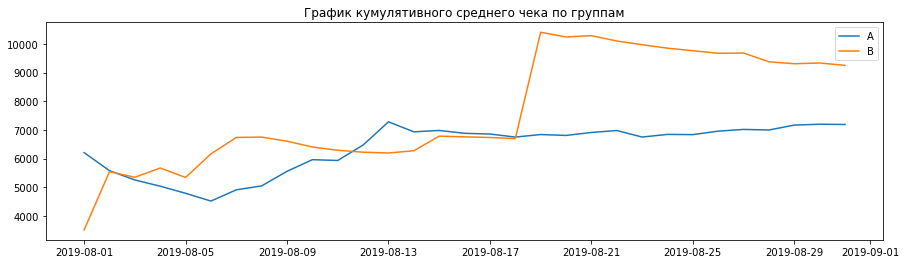

In [16]:
plt.figure(figsize=(15,4))
plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue']/cumulative_revenue_A['orders'], label='A')
plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['revenue']/cumulative_revenue_B['orders'], label='B')
plt.legend()
plt.title('График кумулятивного среднего чека по группам')
plt.show()

Кумулятивное значение среднего чека также показывает, что 17 августа какие-то посетители совершили покупку на очень большую сумму, видимо, нужно найти эти выбросы и убрать их для адекватного анализа теста, так как текущие результаты довольно сильно искажены.

Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

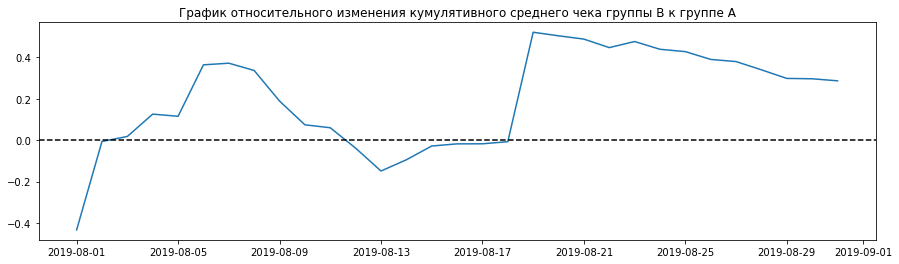

In [17]:
#объединим таблицы cumulative_revenue_A и cumulative_revenue_B методом merge() так, чтобы она содержала столбцы: 
#['date', 'revenueA', 'revenueB', 'ordersA', 'ordersB'], cохраниv в переменной merged_cumulative_revenue.
merged_cumulative_revenue = cumulative_revenue_A.merge(cumulative_revenue_B, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

#построим график относительно различия кумулятивного среднего чека группы B к группе A,
#добавим пунктирную линию оси X (значение оси Y = 0) методом plt.axhline()
plt.figure(figsize=(15,4))
plt.plot(merged_cumulative_revenue['date'], (merged_cumulative_revenue['revenueB']/merged_cumulative_revenue['ordersB'])/(merged_cumulative_revenue['revenueA']/merged_cumulative_revenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.show()

Видим, что результаты теста довольно резко и серьёзно менялись, причём не только после 17 августа, но и 5 августа, 9 августа, а вот 13 августа резкий спад графика. Видимо, как раз в эти даты и были совершены аномальные транзакции.

Построим график кумулятивной конверсии по группам.

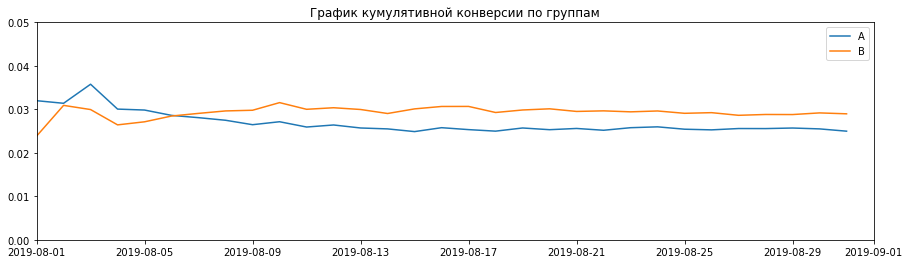

In [18]:
# считаем кумулятивную конверсию
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']

# отделяем данные по группе A
cumulative_data_A = cumulative_data.query('group =="A"')

# отделяем данные по группе B
cumulative_data_B = cumulative_data.query('group =="B"')

# строим графики
plt.figure(figsize=(15,4))
plt.plot(cumulative_data_A['date'], cumulative_data_A['conversion'], label='A')
plt.plot(cumulative_data_B['date'], cumulative_data_B['conversion'], label='B')
plt.legend()
plt.title('График кумулятивной конверсии по группам')

# задаем масштаб осей, чтобы было видно только абсолютное значение колебания в начале и в конце теста
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019,9,1), 0, 0.05])
plt.show()

Итак, в начале теста сегмент А имел бОльшую конверсию, но довольно быстро сегмент B выровнялся и зафиксировался примерно на одно значение выше, чем сегмент А.

Построим график относительного изменения кумулятивной конверсии группы B к группе A.

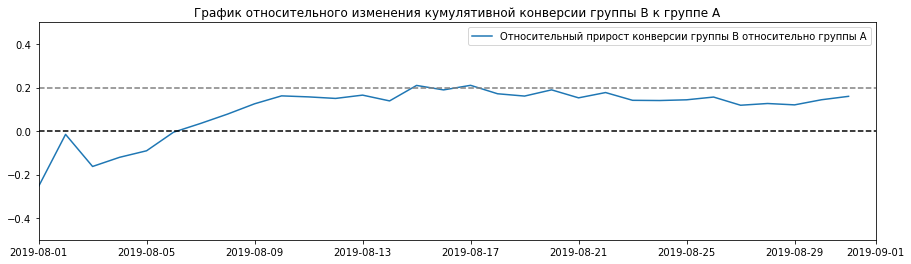

In [19]:
#объединим таблицы cumulative_data_A и cumulative_data_B методом merge() так, чтобы она содержала столбцы: 
#['date', 'conversionA', 'conversionB'], сохраним в переменной merged_cumulative_conversions
merged_cumulative_conversions = cumulative_data_A[['date','conversion']].merge(cumulative_data_B[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

#построим график относительного различия кумулятивной конверсии группы B к группе A
plt.figure(figsize=(15,4))
plt.plot(merged_cumulative_conversions['date'], merged_cumulative_conversions['conversionB']/merged_cumulative_conversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')

#добавим пунктирную линию оси X чёрного цвета ('black') со значением оси Y = 0 методом plt.axhline()
#и ещё одну линию оси X серого цвета ('grey') со значением оси Y = 0.2.
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')

#зададим масштаб осей, чтобы было видно только абсолютное значение колебания в начале и в конце теста
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019,9,1), -0.5, 0.5])
plt.show()

Видим, что почти с самого начала теста группа В лидирует по конверсии, становится лучше, была близка к преодолению уровня прироста в 20% относительно группы В в середине августа, но затем немного снизилась и на конец августа её прирост на уровне примерно 15%.
Пора посмотреть на так называемых аномальных посетителей, чтобы исключить из анализа все выбросы и всплески

## Определение аномальных пользователей

Для начала найдём число транзакций по посетителям

In [20]:
#создаём датафрейм transations_by_visitors c двумя столбцами: 'visitor_id' и 'transactions'
#отсортируем по убыванию количества транзакций посетителей и выведем на экран первые 5 строк.
transactions_by_visitors = (
    orders.groupby('visitor_id', as_index = False)
    .agg({'transaction_id': 'nunique'}).rename(columns = {'transaction_id': 'transactions'})
    .sort_values(by = 'transactions', ascending = False)
)
transactions_by_visitors.head()

,visitor_id,transactions
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3


Строим точечный график количества транзакций по пользователям и считаем 95-й и 99-й перцентили количества транзакций на посетителя

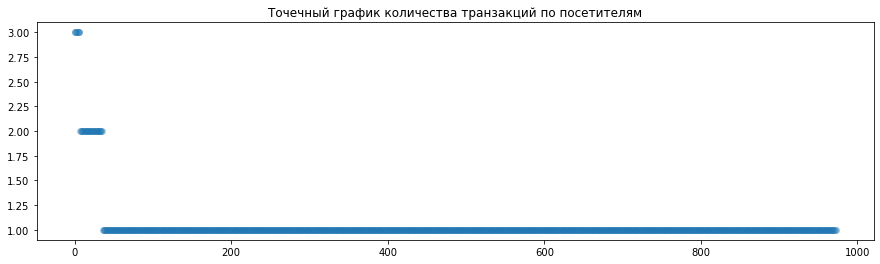

array([1., 2.])

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.10/site-packages/matplotlib/pyplot.py'>

In [21]:
#задаём функцию для построения точечных графиков и подсчёта перцентилей
def plot_and_percentile(variable, title):
    #в переменной x_values — сгенерированные номера наблюдений (от 0 до количества наблюдений в датафрейме)
    x_values = pd.Series(range(0, len(variable)))
    plt.figure(figsize = (15,4)) 
    plt.scatter(x_values, variable, alpha = 0.3)
    plt.title(title)
    plt.show()
    #выводим 95-й и 99-й перцентили 
    display(np.percentile(variable, [95, 99]))
    return plt

plot_and_percentile(transactions_by_visitors['transactions'],'Точечный график количества транзакций по посетителям')

Видим, что посетителей, совершивших более 1-й транзакции, очень немного, соответственно, такие посетители вполне могут быть отнесены к категории аномальных пользователей.

Для того, чтобы в этом убедиться и выбрать границу для определения аномальных пользователей, посчитали 95-й и 99-й перцентили количества транзакций на посетителя. Итак, 95% посетителей совершали не более 1-й транзакции, а 2 и более транзакций совершали всего 1% посетителей, таким образом нормальной границей для определения аномальных пользователей будут посетители совершившие, не более 1-й транзакции.

Теперь построим точечный график стоимостей транзакций и считаем 95-й и 99-й перцентили стоимости транзакций

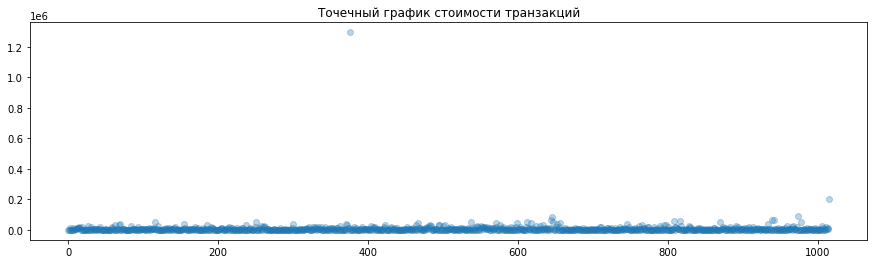

array([26785., 53904.])

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.10/site-packages/matplotlib/pyplot.py'>

In [22]:
plot_and_percentile(orders['revenue'],'Точечный график стоимости транзакций')

Видим, что заказов даже 100 тыс. руб. совсем немного, но есть мощный выброс более 1,2 млн. руб., что выглядит довольно аномально.

Посчитаем 95-й и 99-й перцентили стоимости транзакций и выберем границу для определения аномальных транзакций.
Итак, у 95% посетителей чек не больше 26785 руб., и у лишь у 1% посетителей - чек превышает 53 904 руб. Таким образом, можем считать 26785 руб. - границей для определения аномальных транзакций.

In [23]:
#создадим сводную таблицу из датафрейма ordres, в которой подсчитаем количество транзакций для каждого посетителя 
transactions_by_visitors = (
    orders.pivot_table(index = {'visitor_id', 'group'}, values = 'transaction_id', aggfunc = 'nunique')
    .reset_index().rename(columns = {'transaction_id': 'transactions'})
)

#сделаем срез из сводной таблицы по посетителям с 3 и более транзакциями
#abnormal_visitors = transactions_by_visitors.query('transactions > 1')['visitor_id']
abnormal_visitors = (
    transactions_by_visitors[transactions_by_visitors['transactions'] > np.
                             percentile(transactions_by_visitors['transactions'], 95)]['visitor_id']
)

#сделаем срез из датафрейма orders по посетителям, сумма выручки с которых более 28 тыс. руб.
#visitors_with_expensive_transactions = orders.query('revenue>26785')['visitor_id']
visitors_with_expensive_transactions = orders[orders['revenue'] > np.percentile(orders['revenue'], 95)]['visitor_id']

#объединим оба среза и выведем общее количество аномальных пользователейabnormal_visitors = transactions_by_visitors[transactions_by_visitors['transactions'] > np.percentile(transactions_by_visitors['transactions'], 95)]['visitor_id']
abnormal_visitors = (
    pd.concat([abnormal_visitors, visitors_with_expensive_transactions], axis = 0)
    .drop_duplicates().sort_values()
)
abnormal_visitors.shape[0]

86

Таким образом, определили аномальных пользователей, как тех, которые совершают более 1-й транзакции, а чек покупки которых превышает 26785 рублей, всего таких посетителей 86.

## Анализ выбросов и всплесков

Для начала подготовим данные: сгруппируем данные из датафреймов orders и visitors отдельно из каждой группы(А и В) по датам, создадим новый общий датафрейм data, в котором будут отображены н/у столбцы:
- date - дата
- transaction_per_date_A - количество транзакций в группе А в текущую дату
- revenue_per_date_A - сумма дохода в группе А в текущую дату
- transaction_per_date_B - количество транзакций в группе B в текущую дату
- revenue_per_date_B - сумма дохода в группе А в текущую дату
- transaction_cummulative_A - общее количество транзакций в группе А с первого дня проведения теста до текущей даты вкл-но
- revenue_cummulative_A - общая сумма дохода в группе А с первого дня проведения теста до текущей даты вкл-но
- transaction_cummulative_B - общее количество транзакций в группе B с первого дня проведения теста до текущей даты вкл-но
- revenue_cummulative_B - общая сумма дохода в группе В с первого дня проведения теста до текущей даты вкл-но
- visitors_per_date_A - количество посетителей в группе А в текущую дату
- visitors_per_date_B - количество посетителей в группе В в текущую дату
- visitors_cummulative_A - общее количество посетителей в группе А с первого дня проведения теста до текущей даты вкл-но
- visitors_cummulative_B - общее количество посетителей в группе В с первого дня проведения теста до текущей даты вкл-но

In [24]:
# группируем данные из датафрейма visitors отдельно для каждой группы A и B
visitors_A_Daily = visitors.query('group == "A"')[['date', 'visitors']].rename(columns = {'visitors': 'visitors_per_date_A'})
visitors_B_Daily = visitors.query('group == "B"')[['date', 'visitors']].rename(columns = {'visitors': 'visitors_per_date_B'})

#далее дополняем датафреймы с данными по каждой группе дополнительным столбцом, который подсчитает так называемое 
#кумулятивное количество посетителей, то есть куммулятивное количество посетителей 1-го дня останется неизменным, 
#куммулятивное количество посетителей 2-го дня - общее количество посетителей 1-го и 2-го дней, соответственно, 
#куммулятивное количество посетителей 3-го дня - общее количество посетителей 1-го, 2-го и 3-го дней и т.д.
visitors_A_cummulative = (
    visitors_A_Daily
    .apply(lambda x: visitors_A_Daily[visitors_A_Daily['date'] <= x['date']]
                           .agg({'date': 'max', 'visitors_per_date_A': 'sum'}),axis=1)
    .rename(columns = {'visitors_per_date_A': 'visitors_cummulative_A'})
)

visitors_B_cummulative = (
    visitors_B_Daily
    .apply(lambda x: visitors_B_Daily[visitors_B_Daily['date'] <= x['date']]
                           .agg({'date': 'max', 'visitors_per_date_B': 'sum'}),axis=1)
    .rename(columns = {'visitors_per_date_B': 'visitors_cummulative_B'})
)

#аналогично группируем данные из датафрейма orders отдельно для каждой группы
transactions_A_daily = (
    orders
    .query('group == "A"')[['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': 'nunique', 'revenue': 'sum'})
    .rename(columns = {'transaction_id': 'transaction_per_date_A', 'revenue': 'revenue_per_date_A'})
)

transactions_B_daily = (
    orders
    .query('group == "B"')[['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': 'nunique', 'revenue': 'sum'})
    .rename(columns = {'transaction_id': 'transaction_per_date_B', 'revenue': 'revenue_per_date_B'})
)

#аналогично дополняем датафреймы с транзакциями дополнительными столбцами с куммулятивным количеством транзакций и 
#куммулятивным доходом на каждую дату
transactions_A_cummulative = (
    transactions_A_daily
    .apply(lambda x: transactions_A_daily[transactions_A_daily['date'] <= x['date']]
           .agg({'date': 'max', 'transaction_per_date_A': 'sum', 'revenue_per_date_A': 'sum'}), axis=1)
    .sort_values(by=['date'])
    .rename(columns = {'transaction_per_date_A': 'transaction_cummulative_A', 'revenue_per_date_A': 'revenue_cummulative_A'})
)

transactions_B_cummulative = (
    transactions_B_daily
    .apply(lambda x: transactions_B_daily[transactions_B_daily['date'] <= x['date']]
           .agg({'date': 'max', 'transaction_per_date_B': 'sum', 'revenue_per_date_B': 'sum'}), axis=1)
    .sort_values(by=['date'])
    .rename(columns = {'transaction_per_date_B': 'transaction_cummulative_B', 'revenue_per_date_B': 'revenue_cummulative_B'})
)

#объединяем данные по обеим группам в один общий датафрейм по дате
data = (
    transactions_A_daily
    .merge(transactions_B_daily, left_on='date', right_on='date', how='left')
    .merge(transactions_A_cummulative, left_on='date', right_on='date', how='left')
    .merge(transactions_B_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_A_Daily, left_on='date', right_on='date', how='left')
    .merge(visitors_B_Daily, left_on='date', right_on='date', how='left')
    .merge(visitors_A_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_B_cummulative, left_on='date', right_on='date', how='left')
)

data.head()

,date,transaction_per_date_A,revenue_per_date_A,transaction_per_date_B,revenue_per_date_B,transaction_cummulative_A,revenue_cummulative_A,transaction_cummulative_B,revenue_cummulative_B,visitors_per_date_A,visitors_per_date_B,visitors_cummulative_A,visitors_cummulative_B
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


Теперь посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным — без удаления аномальных пользователей. 
Сформулируем гипотезы. 
- Нулевая: различий в конверсии между группами нет.
- Альтернативная: различия в конверсии между группами есть.

In [25]:
#объявим переменные transactions_by_visitors_A и transactions_by_visitors_B, в которых пользователи будут разбиты на группы 
transactions_by_visitors_A = transactions_by_visitors.query('group == "A"')
transactions_by_visitors_B = transactions_by_visitors.query('group == "B"')
#объявим переменные sample_A и sample_B, в которых посетителям с транзакциями будет соответствовать число транзакций посетителя,
#а пользователям без транзакций — нули
sample_A = pd.concat(
    [transactions_by_visitors_A['transactions'], pd.Series(0,index=np.arange(
        data['visitors_per_date_A'].sum() - len(transactions_by_visitors_A['transactions'])), name='transactions')], axis=0)

sample_B = pd.concat(
    [transactions_by_visitors_B['transactions'], pd.Series(0,index=np.arange(
        data['visitors_per_date_B'].sum() - len(transactions_by_visitors_B['transactions'])), name='transactions')], axis=0)

In [26]:
#зададим функцию для расчёта критерия Манна-Уитни, вывода p-value для сравнений между группами
def mannwhitneyu_test(var1, var2, words):
    #зададим критический уровень статистической значимости для удобства сравнения и оценки гипотез
    alpha = .05 
    results = st.mannwhitneyu(var1, var2)
    print('p-значение: {0:.5f}'.format(results.pvalue))
    
    if results.pvalue < alpha:
        print('Нулевая гипотеза опровергнута: разница в', words, 'между группами статистически значима')
    else:
        print('Не получилось опровергнуть нулевую гипотезу, вывод о различии в', words, 'между группами сделать нельзя')

#вычислим и выведем относительное различие в конверсии между группами
    print('Относительный прирост в', words, ': {0:.2%}'.format(var2.mean() / var1.mean() - 1))
    return 

In [27]:
#применим функцию для сравнения конверсии между группами
mannwhitneyu_test(sample_A, sample_B, 'конверсии')

p-значение: 0.01102
Нулевая гипотеза опровергнута: разница в конверсии между группами статистически значима
Относительный прирост в конверсии : 15.98%


Анализ "сырых данных" даёт нам понять, что  в конверсии между группами могут быть статистически значимые отличия.
Относительный прирост конверсии группы В к конверсии группы А равен примерно 15,98%.

Теперь посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 
Сформулируем гипотезы:
- Нулевая: различий в среднем чеке между группами нет. 
- Альтернативная: различия в среднем чеке между группами есть.

In [28]:
#передадим функции данные о выручке с транзакций
mannwhitneyu_test(orders.query('group =="A"')['revenue'], orders.query('group =="B"')['revenue'], 'среднем чеке')

p-значение: 0.82949
Не получилось опровергнуть нулевую гипотезу, вывод о различии в среднем чеке между группами сделать нельзя
Относительный прирост в среднем чеке : 28.66%


Видим, что нулевая гипотеза не опровергается анализом "сырых данных", это даёт нам понять, что в среднем чеке между группами вряд ли есть статистически значимые отличия. При этом относительный прирост среднего чека между группами составляет примерно 28,66%, возможно это произошло из-за искажения данных выбросами и всплесками.

Теперь посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным. 

In [29]:
#сначала подготовим выборки количества транзакций по посетителям по группам теста:
sample_A_filtered = (
    pd.concat([transactions_by_visitors_A[np.logical_not(transactions_by_visitors_A['visitor_id']
                                                         .isin(abnormal_visitors))]['transactions'],pd
               .Series(0, index=np.arange(data['visitors_per_date_A'].sum() - len(transactions_by_visitors_A['transactions'])
                          ),name='transactions')], axis=0)
)

sample_B_filtered = (
    pd.concat([transactions_by_visitors_B[np.logical_not(transactions_by_visitors_B['visitor_id']
                                                         .isin(abnormal_visitors))]['transactions'],pd
               .Series(0, index=np.arange(data['visitors_per_date_B'].sum() - len(transactions_by_visitors_B['transactions'])
                          ),name='transactions')], axis=0)
)

mannwhitneyu_test(sample_A_filtered, sample_B_filtered, 'конверсии')

p-значение: 0.01593
Нулевая гипотеза опровергнута: разница в конверсии между группами статистически значима
Относительный прирост в конверсии : 17.39%


Анализ "очищенных данных", как и, ранее анализ "сырых данных", даёт нам понять, что в конверсии между группами, скорее всего, есть статистически значимые отличия. А относительный прирост конверсии группы В к конверсии группы А на 1-2% больше, чем при анализе "сырых данных" и составил примерно 17,39%.

Теперь посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 

In [30]:
#сначала подготовим выборки выручки по посетителям по группам теста:
revenue_A_filtered = (
    orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitor_id'].isin(abnormal_visitors)))]['revenue']
)
revenue_B_filtered = (
    orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitor_id'].isin(abnormal_visitors)))]['revenue']
)

mannwhitneyu_test(revenue_A_filtered, revenue_B_filtered, 'среднем чеке')

p-значение: 0.72713
Не получилось опровергнуть нулевую гипотезу, вывод о различии в среднем чеке между группами сделать нельзя
Относительный прирост в среднем чеке : -3.37%


Видим, что даже без учёта аномальных пользователей в среднем чеке между группами не обнаруживаются статистически значимые отличия, при этом относительное различие среднего чека между группами составляет теперь -3,37%, то есть сумма среднего чека в группе В стала меньше суммы среднего чека в группе А.

## Выводы и принятие решения

Итак, мы получили следующие результаты анализа А/В-теста:
- есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий.
- нет статистически значимых различий по среднему чеку между группами как по "сырым", так и по "отфильстрованным" данным
- график различия конверсии между группами сообщает, что результаты группы B лучше группы A: имеют тенденцию к росту, либо зафиксировались около среднего значения
- график различия среднего чека колеблется,сделать из этого графика определённые выводы сложно, это позволило нам определить аномальных пользователей и после фильтрации данных стало понятно, что сумма среднего чека снизилась в группе В по сравнению с группой А.

Исходя из этих фактов наилучшим решением было бы, наверное, остановить тест, зафиксировав отсутствие различий между группами в силу того, что интернет-магазин, в первую очередь интересует, конечно, увеличение среднего чека, чем рост конверсии.

Однако, если есть такие возможности (финансовые и временные ресурсы) можно было бы попробовать продолжить тест, так как раз конверсия в группе В показывает хороший рост, возможно спустя какое-то время начнёт расти и сумма среднего чека.

Кроме того, на результаты теста мог повлиять такой фактор, как некорректное деление трафика теста. Попробуем проверить эту гипотезу и сравним доли посетителей, совершивших транзакции в каждой из групп. 

In [31]:
info_per_group = orders.groupby('group').agg({'visitor_id': 'nunique', 'transaction_id': 'count', 'revenue': {'sum', 'mean'}}).reset_index()
info_per_group.columns = ['group','visitors', 'transactions', 'revenue_sum', 'revenue_mean']
info_per_group

,group,visitors,transactions,revenue_sum,revenue_mean
0,A,445,468,7189.435897,3364656
1,B,528,548,9249.948905,5068972


In [32]:
print(
    'Относительное различие количества транзакций между группами: {:.2%}'
    .format(1 - info_per_group['transactions'][0]/info_per_group['transactions'][1])
)

Относительное различие количества транзакций между группами: 14.60%


In [33]:
print(
    'Относительное различие количества уникальных посетителей, совершивших транзакции, между группами: {:.2%}'
    .format(1 - info_per_group['visitors'][0]/info_per_group['visitors'][1])
)

Относительное различие количества уникальных посетителей, совершивших транзакции, между группами: 15.72%


In [34]:
total_visitors_per_group = visitors.pivot_table(columns = 'group', values = 'visitors', aggfunc = 'sum').T.reset_index()
total_visitors_per_group

,group,visitors
0,A,18736
1,B,18916


In [35]:
print(
    'Относительное различие общего количества посетителей между группами: {:.2%}'
    .format(1 - total_visitors_per_group['visitors'][0]/total_visitors_per_group['visitors'][1])
)

Относительное различие общего количества посетителей между группами: 0.95%


Видим, что транзакций в группе В несколько больше, чем транзакций в группе А (640 против 557), таким образом относительное различие количества транзакций составляет порядка 13%, также различается количество уникальных посетителей, совершивших транзакции,  в каждой из групп: в группе А - 503, в группе В - 586, относительное различие количества  таких посетителей равно, соответственно, чуть больше 14%. 
При этом общее количество посетителей, распределённых по группам и включая повторяющихся, в течение всего срока проведения теста отличается менее, чем на 1% (18916 посетителей из группы В против 18736 посетителей из группы В). 
Как известно, разные доли могут довольно сильно искажать результаты, так, сейчас кажется, что возможно лучше было бы прервать тест, зафиксировав отсутствие различий между группами, и это может стать ошибкой ввиду неравномерного распределения изначальных данных.

Так 18736 посетителей группы A совершили 557 транзакций, а 18916 посетителей группы В - 640 транзакций.
Проверим, с помощью небольшого теста, можно ли сделать вывод о разнице в конверсии посещения в транзакцию для групп А и В.
Сформулируем гипотезы:
- Нулевая гипотеза: между долями значимой разницы нет
- Альтернативная гипотеза: между долями есть значимая разница

In [36]:
# проверим гипотезу о равенстве пропорций транзакций в группах, 
#для удобства сравнения зададим критический уровень статистической значимости
alpha = .05
successes = np.array(info_per_group['transactions'])
trials = np.array(total_visitors_per_group['visitors'])

# вычислим пропорции транзакций в каждой из групп, а также в общем:
p1 = successes[0]/trials[0]
print('Доля транзакций в группе А: {:.2%}'.format(p1))
p2 = successes[1]/trials[1]
print('Доля транзакций в группе B: {:.2%}'.format(p2))
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])
print('Доля транзакций в общем: {:.2%}'.format(p_combined))

# вычислим разницу пропорций в датасетах
difference = p1 - p2

# считаем статистику в стандартных отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1)

# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1 / trials[0] + 1 / trials[1]))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1)

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')

Доля транзакций в группе А: 2.50%
Доля транзакций в группе B: 2.90%
Доля транзакций в общем: 2.70%
p-значение:  0.016851380434703023
Отвергаем нулевую гипотезу: между долями есть значимая разница


Выходит, что такая разница в пропорциях при указанных размерах выборок достаточна, чтобы говорить о статистически значимом различии. Хотя на первый взгляд, различие 2,97% и 3,38% кажется небольшим, а значит, результаты нашего А/В-теста вполне могут оказаться некорректными, в силу чего лучше было бы продолжить тестирование и постараться устранить проблему некорректного деления трафика теста.

## Общий вывод

В результате проведённого исследования мы приоритизировали гипотезы для увеличения выручки крупного интернет-магазина, проанализировали результаты A/B-теста, а также приняли решение по результатам теста.

Исследование было разделено на две части:
1) В первой части мы занимались оценкой и приоритизацией 9-ти гипотез по увеличению выручки интернет-магазина.
Применив для приоритезации гипотез фреймворки ICE и RICE выяснили, что наиболее перспективными гипотезами являются гипотезы с порядковыми номерами 8, 3, 1, 7, 9. Приоритизация гипотез при применении ICE несколько отличается от приоритизация гипотез при применении RICE, это происходит из-за параметра Reach, который показывает, скольких пользователей затронет изменение, которое мы хотим внести. Так, у гипотез с номерами 8 и 3 он равен, соответственно 10 и 8 баллам, в то время, как у других гипотез этот показатель набрал сильно меньше баллов.Поскольку при выборе гипотез в качестве наиболее приоритетных и перспективных необходимо, в том числе, учитывать охват пользователей, которых она затронет, лучше руководствоваться приоритизацией с помощью RICE. Значит, самым перспективными гипотезами будем считать 8 и 3.
- Гипотеза 8. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- Гипотеза 3. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа

2) Во второй части мы проанализировали A/B-тест и приняли решение по его результатам
В ходе работы с куммулятивными метриками мы получили информацию о том, что кумулятивная конверсия в группе В немного выше, чем в группе А, однако график кумулятивного среднего чека показал, что в данных есть выбросы и всплески, которые могут помешать корректной оценке результатов теста. Таким образом, мы вычленили и сформировали представление об аномальных пользователях, общее чсло которых составило 74, затем мы проанализировали статистическую значимость различий и относительные различия в конверсии  и в среднем чеке заказа между группами как по «сырым» данным, так и по «очищенным» данным. Выяснили, что существует статистическая значимость различий в конверсии между группами как по «сырым» данным, так и по данным без аномальных пользователей. Относительное увеличение конверсии  примерно на 3-4% в группе В относительно группы А также было зафиксировано.
Однако статистической значимости различий между группами по среднему чеку выявлено не было, более того анализ «очищенных» данных показал снижение среднего чека почти на 2% в группе В по сравнению с группой А. 

В результате логичным было бы принять решение об остановке тест с фиксацией отсутствия различий между группами, так как  увеличение среднего чека для интернет-магазина в общем и целом важнее конверсии. Однако останавливал тот факт, что конверсия в группе В всё-таки лучше. Поэтому было решено дополнительно проверить гипотезу о равенстве долей, так как при анализе А/B-тестов нередко возникает проблема некорректного деления трафика теста, например, когда пользователи распределяются между сегментами неравномерно. Мы проверили гипотезу о равенстве пропорций между посещениями в транзакциями в группах и выяснили, что разница в пропорциях достаточна, чтобы говорить о статистически значимом различии между группами, а это значит, результаты нашего А/В-теста вполне могли оказаться некорректными, в силу чего всё-таки принять решение о продолжении тестирования.